# Análisis Exploratorio

En este _notebook_ organizamos el conjunto de datos del censo de ingresos y KDD en formato _tidy_, y exploramos su contenido. Efectuamos _One-hot encoding_ para seleccionar _features_ que permitan ajustar un modelo de clasificación posteriormente.  También se identificó que el censo tiene información de niños, la cual no es útil para extraer información de empleo, pero si es útil para hacer un análisis demográfico. 

## Objetivo

Explorar el conjunto de datos a la luz de las variables (_features_) suministradas.

---

In [2]:
## Required modules
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn_pandas import gen_features
from sklearn_pandas import DataFrameMapper
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

import pandas as pd
import numpy as np

# Pandas options
pd.set_option('display.max_columns', 500)

## Importar datos

A continuación importamos el conjunto de datos de entrenamiento original. Podemos notar que las _features_ no tienen nombres.

In [3]:
# Import the data set without column names
col_nums = list(range(42))
census = pd.read_csv("data/census-income.data", names=col_nums, index_col=False)
census.head()

0                                1   2   3                            4   \
0  73                  Not in universe   0   0         High school graduate   
1  58   Self-employed-not incorporated   4  34   Some college but no degree   
2  18                  Not in universe   0   0                   10th grade   
3   9                  Not in universe   0   0                     Children   
4  10                  Not in universe   0   0                     Children   

   5                 6               7                             8   \
0   0   Not in universe         Widowed   Not in universe or children   
1   0   Not in universe        Divorced                  Construction   
2   0       High school   Never married   Not in universe or children   
3   0   Not in universe   Never married   Not in universe or children   
4   0   Not in universe   Never married   Not in universe or children   

                                     9                           10  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

           11       12                13                14  \
0   All other   Female   Not in universe   Not in universe   
1   All other     Male   Not in universe   Not in universe   
2   All other   Female   Not in universe   Not in universe   
3   All other   Female   Not in universe   Not in universe   
4   All other   Female   Not in universe   Not in universe   

                          15  16  17  18                  19  \
0         Not in labor force   0   0   0            Nonfiler   
1   Children or Armed Forces   0   0   0   Head of household   
2         Not in labor force   0   0   0            Nonfiler   
3   Children or Armed Forces   0   0   0            Nonfiler   
4   Children or Armed Forces   0   0   0            Nonfiler   

                 20                21  \
0   Not in universe   Not in universe   
1             South          Arkansas   
2   Not in universe   Not in universe   
3   Not in universe   Not in universe   
4   Not in universe   Not in universe   

                                          22                              23  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
3      Child <18 never marr not in subfamily    Child under 18 never married   
4      Child <18 never marr not in subfamily    Child under 18 never married   

        24           25            26            27  \
0  1700.09            ?             ?             ?   
1  1053.55   MSA to MSA   Same county   Same county   
2   991.95            ?             ?             ?   
3  1758.14     Nonmover      Nonmover      Nonmover   
4  1069.16     Nonmover      Nonmover      Nonmover   

                                  28                29  30  \
0   Not in universe under 1 year old                 ?   0   
1                                 No               Yes   1   
2   Not in universe under 1 year old                 ?   0   
3                                Yes   Not in universe   0   
4                                Yes   Not in universe   0   

                      31              32              33              34  \
0        Not in universe   United-States   United-States   United-States   
1        Not in universe   United-States   United-States   United-States   
2        Not in universe         Vietnam         Vietnam         Vietnam   
3   Both parents present   United-States   United-States   United-States   
4   Both parents present   United-States   United-States   United-States   

               

---

## Asignación de nombres

Exploremos el contenido de las columnas

In [4]:
census.describe()

0              2              3              5   \
count  199523.000000  199523.000000  199523.000000  199523.000000   
mean       34.494199      15.352320      11.306556      55.426908   
std        22.310895      18.067129      14.454204     274.896454   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.000000       0.000000       0.000000       0.000000   
50%        33.000000       0.000000       0.000000       0.000000   
75%        50.000000      33.000000      26.000000       0.000000   
max        90.000000      51.000000      46.000000    9999.000000   

                 16             17             18             24  \
count  199523.00000  199523.000000  199523.000000  199523.000000   
mean      434.71899      37.313788     197.529533    1740.380269   
std      4697.53128     271.896428    1984.163658     993.768156   
min         0.00000       0.000000       0.000000      37.870000   
25%         0.00000       0.000000       0.000000    1061.615000   
50%         0.00000       0.000000       0.000000    1618.310000   
75%         0.00000       0.000000       0.000000    2188.610000   
max     99999.00000    4608.000000   99999.000000   18656.300000   

                  30             36             38             39  \
count  199523.000000  199523.000000  199523.000000  199523.000000   
mean        1.956180       0.175438       1.514833      23.174897   
std         2.365126       0.553694       0.851473      24.411488   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       2.000000       8.000000   
75%         4.000000       0.000000       2.000000      52.000000   
max         6.000000       2.000000       2.000000      52.000000   

                  40  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000

Exploremos también el contenido de las variables y comparemos con la descripción del conjunto de datos dada en [*docs.1010data*](https://docs.1010data.com/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html)

In [5]:
census.iloc[:,23].unique()  # This is 'det_hh_summ'

array([' Other relative of householder', ' Householder',
       ' Child 18 or older', ' Child under 18 never married',
       ' Spouse of householder', ' Nonrelative of householder',
       ' Group Quarters- Secondary individual',
       ' Child under 18 ever married'], dtype=object)

In [6]:
census.iloc[:,14].unique() # This is 'unemp_reason'

array([' Not in universe', ' Job loser - on layoff', ' Other job loser',
       ' New entrant', ' Re-entrant', ' Job leaver'], dtype=object)

In [7]:
census.iloc[:,11].unique()  # This is 'hisp_origin'

array([' All other', ' Do not know', ' Central or South American',
       ' Mexican (Mexicano)', ' Mexican-American', ' Other Spanish',
       ' Puerto Rican', ' Cuban', ' Chicano', ' NA'], dtype=object)

In [8]:
len(census.iloc[:,5].unique()) # Wage per hour meets specifications from the website

1240


Con la infpormación del sitio web creamos un fichero `*.csv` que caracteriza a las variables. 

`own_or_self` y `vet_benefits` son variables categóricas codificadas con números enteros. Algunas otras variables numéricas corresponden en realidad a codificaciones de variables categóricas, como por ejemplo `det_ind_code` y `det_occ_code`. El fichero clasifica estas variables teniendo en cuenta su verdadera naturaleza.

In [9]:
# Names of features
features = pd.read_csv("data/names.csv", sep=';')
features.head()

Num          Code             Feature         Type
0    0           age   Age of the worker      numeric
1    1  class_worker     Class of worker  categorical
2    2  det_ind_code       Industry code  categorical
3    3  det_occ_code     Occupation code  categorical
4    4     education  Level of education  categorical

In [10]:
col_names = features.Code.tolist()
print('Columns:\n', col_names, '\n\nNumber of columns:', len(col_names))

Columns:
 ['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education', 'wage_per_hour', 'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses', 'stock_dividends', 'tax_filer_stat', 'region_prev_res', 'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'instance_weight', 'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt', 'num_emp', 'fam_under_18', 'country_father', 'country_mother', 'country_self', 'citizenship', 'own_or_self', 'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'] 

Number of columns: 42


Entonces, asignamos la columna `Code` del _data frame_ `feature` al conjunto de datos `census`.

In [11]:
census_def = pd.read_csv("data/census-income.data", names=col_names, index_col=False)
census_def.head()

age                     class_worker  det_ind_code  det_occ_code  \
0   73                  Not in universe             0             0   
1   58   Self-employed-not incorporated             4            34   
2   18                  Not in universe             0             0   
3    9                  Not in universe             0             0   
4   10                  Not in universe             0             0   

                     education  wage_per_hour        hs_college  \
0         High school graduate              0   Not in universe   
1   Some college but no degree              0   Not in universe   
2                   10th grade              0       High school   
3                     Children              0   Not in universe   
4                     Children              0   Not in universe   

     marital_stat                major_ind_code  \
0         Widowed   Not in universe or children   
1        Divorced                  Construction   
2   Never married   Not in universe or children   
3   Never married   Not in universe or children   
4   Never married   Not in universe or children   

                         major_occ_code                        race  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
3                       Not in universe                       White   
4                       Not in universe                       White   

  hisp_origin      sex      union_member      unemp_reason  \
0   All other   Female   Not in universe   Not in universe   
1   All other     Male   Not in universe   Not in universe   
2   All other   Female   Not in universe   Not in universe   
3   All other   Female   Not in universe   Not in universe   
4   All other   Female   Not in universe   Not in universe   

            full_or_part_emp  capital_gains  capital_losses  stock_dividends  \
0         Not in labor force              0               0                0   
1   Children or Armed Forces              0               0                0   
2         Not in labor force              0               0                0   
3   Children or Armed Forces              0               0                0   
4   Children or Armed Forces              0               0                0   

       tax_filer_stat   region_prev_res    state_prev_res  \
0            Nonfiler   Not in universe   Not in universe   
1   Head of household             South          Arkansas   
2            Nonfiler   Not in universe   Not in universe   
3            Nonfiler   Not in universe   Not in universe   
4            Nonfiler   Not in universe   Not in universe   

                             det_hh_fam_stat                     det_hh_summ  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
3      Child <18 never marr not in subfamily    Child under 18 never married   
4      Child <18 never marr not in subfamily    Child under 18 never married   

   instance_weight  mig_chg_msa   mig_chg_reg  mig_move_reg  \
0          1700.09            ?             ?             ?   
1          1053.55   MSA to MSA   Same county   Same county   
2           991.95            ?             ?             ?   
3          1758.14     Nonmover      Nonmover      Nonmover   
4          1069.16     Nonmover      Nonmover      Nonmover   

                            mig_same  mig_prev_sunbelt  num_emp  \
0   Not in universe under 1 year old                 ?        0   
1                                 No               Yes        1   
2   Not in universe under 1 year old                 ?        0   
3                                Yes   Not in universe        0   
4                      

In [12]:
census_def.own_or_self.unique()

array([0, 2, 1], dtype=int64)

In [13]:
census_def.vet_benefits.unique()

array([2, 0, 1], dtype=int64)

---

In [14]:
census_def.education.unique()

array([' High school graduate', ' Some college but no degree',
       ' 10th grade', ' Children', ' Bachelors degree(BA AB BS)',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' Doctorate degree(PhD EdD)', ' 9th grade',
       ' 1st 2nd 3rd or 4th grade'], dtype=object)

Los niños son un grupo especial. Ellos no tienen información de salario disponible porque no pertenecen al mercado laboral, tampoco pertenecen a ningún sector económico.

In [15]:
census_child = census_def[(census_def.education==' Children')]
census_child.head()

age      class_worker  det_ind_code  det_occ_code  education  \
3     9   Not in universe             0             0   Children   
4    10   Not in universe             0             0   Children   
10    8   Not in universe             0             0   Children   
15   13   Not in universe             0             0   Children   
20   12   Not in universe             0             0   Children   

    wage_per_hour        hs_college    marital_stat  \
3               0   Not in universe   Never married   
4               0   Not in universe   Never married   
10              0   Not in universe   Never married   
15              0   Not in universe   Never married   
20              0   Not in universe   Never married   

                  major_ind_code    major_occ_code    race        hisp_origin  \
3    Not in universe or children   Not in universe   White          All other   
4    Not in universe or children   Not in universe   White          All other   
10   Not in universe or children   Not in universe   White          All other   
15   Not in universe or children   Not in universe   Black          All other   
20   Not in universe or children   Not in universe   Other   Mexican-American   

        sex      union_member      unemp_reason           full_or_part_emp  \
3    Female   Not in universe   Not in universe   Children or Armed Forces   
4    Female   Not in universe   Not in universe   Children or Armed Forces   
10   Female   Not in universe   Not in universe   Children or Armed Forces   
15   Female   Not in universe   Not in universe   Children or Armed Forces   
20     Male   Not in universe   Not in universe   Children or Armed Forces   

    capital_gains  capital_losses  stock_dividends tax_filer_stat  \
3               0               0                0       Nonfiler   
4               0               0                0       Nonfiler   
10              0               0                0       Nonfiler   
15              0               0                0       Nonfiler   
20              0               0                0       Nonfiler   

     region_prev_res    state_prev_res  \
3    Not in universe   Not in universe   
4    Not in universe   Not in universe   
10   Not in universe   Not in universe   
15   Not in universe   Not in universe   
20             South              Utah   

                           det_hh_fam_stat                    det_hh_summ  \
3    Child <18 never marr not in subfamily   Child under 18 never married   
4    Child <18 never marr not in subfamily   Child under 18 never married   
10   Child <18 never marr not in subfamily   Child under 18 never married   
15   Child <18 never marr not in subfamily   Child under 18 never married   
20   Child <18 never marr not in subfamily   Child under 18 never married   

    instance_weight  mig_chg_msa        mig_chg_reg  \
3           1758.14     Nonmover           Nonmover   
4           1069.16     Nonmover           Nonmover   
10          2466.24     Nonmover           Nonmover   
15          1520.08     Nonmover           Nonmover   
20           455.02   MSA to MSA   Different region   

                 mig_move_reg mig_same  mig_prev_sunbelt  num_emp  \
3                    Nonmover      Yes   Not in universe        0   
4                    Nonmover      Yes   Not in universe        0   
10                   Nonmover      Yes   Not in universe        0   
15                   Nonmover      Yes   Not in universe        0   
20   Different state in South       No               Yes        0   

             fam_under_18  country_father  country_mother    country_self  \
3    Both parents present   United-States   United-States   United-States   
4    Both parents present   United-States   United-States   United-States   
10   Both parents present   United-States   United-States   United-States   
15   Both parents present   United-States   United-States   United-States   
20   Both parents present   United-States   Un

In [16]:
census_child.isna().sum()

age                 0
class_worker        0
det_ind_code        0
det_occ_code        0
education           0
wage_per_hour       0
hs_college          0
marital_stat        0
major_ind_code      0
major_occ_code      0
race                0
hisp_origin         0
sex                 0
union_member        0
unemp_reason        0
full_or_part_emp    0
capital_gains       0
capital_losses      0
stock_dividends     0
tax_filer_stat      0
region_prev_res     0
state_prev_res      0
det_hh_fam_stat     0
det_hh_summ         0
instance_weight     0
mig_chg_msa         0
mig_chg_reg         0
mig_move_reg        0
mig_same            0
mig_prev_sunbelt    0
num_emp             0
fam_under_18        0
country_father      0
country_mother      0
country_self        0
citizenship         0
own_or_self         0
vet_question        0
vet_benefits        0
weeks_worked        0
year                0
income_50k          0
dtype: int64

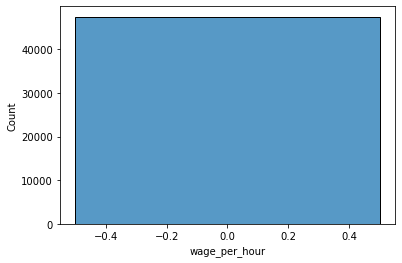

In [17]:
sns.histplot(data=census_child, x='wage_per_hour');

In [18]:
census_child.wage_per_hour.sum()

0

En efecto, los niños tienen un salario nulo. Para el objetivo marcado al principio, éstos datos no son útiles. A continuación, se excluyen.

In [19]:
census_adult = census_def[(census_def.education!=' Children')]

## EDA

Filtermos el nombre de las columnas categóricas y examinemos el balanceo de las clases.

In [19]:
categ_features = features[features.Type=='categorical'].Code.tolist()
print(categ_features, '\n\n Number of cat columns:', len(categ_features))

['class_worker', 'det_ind_code', 'det_occ_code', 'education', 'hs_college', 'marital_stat', 'major_ind_code', 'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member', 'unemp_reason', 'full_or_part_emp', 'tax_filer_stat', 'region_prev_res', 'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same', 'mig_prev_sunbelt', 'fam_under_18', 'country_father', 'country_mother', 'country_self', 'citizenship', 'own_or_self', 'vet_question', 'vet_benefits', 'income_50k'] 

 Number of cat columns: 33


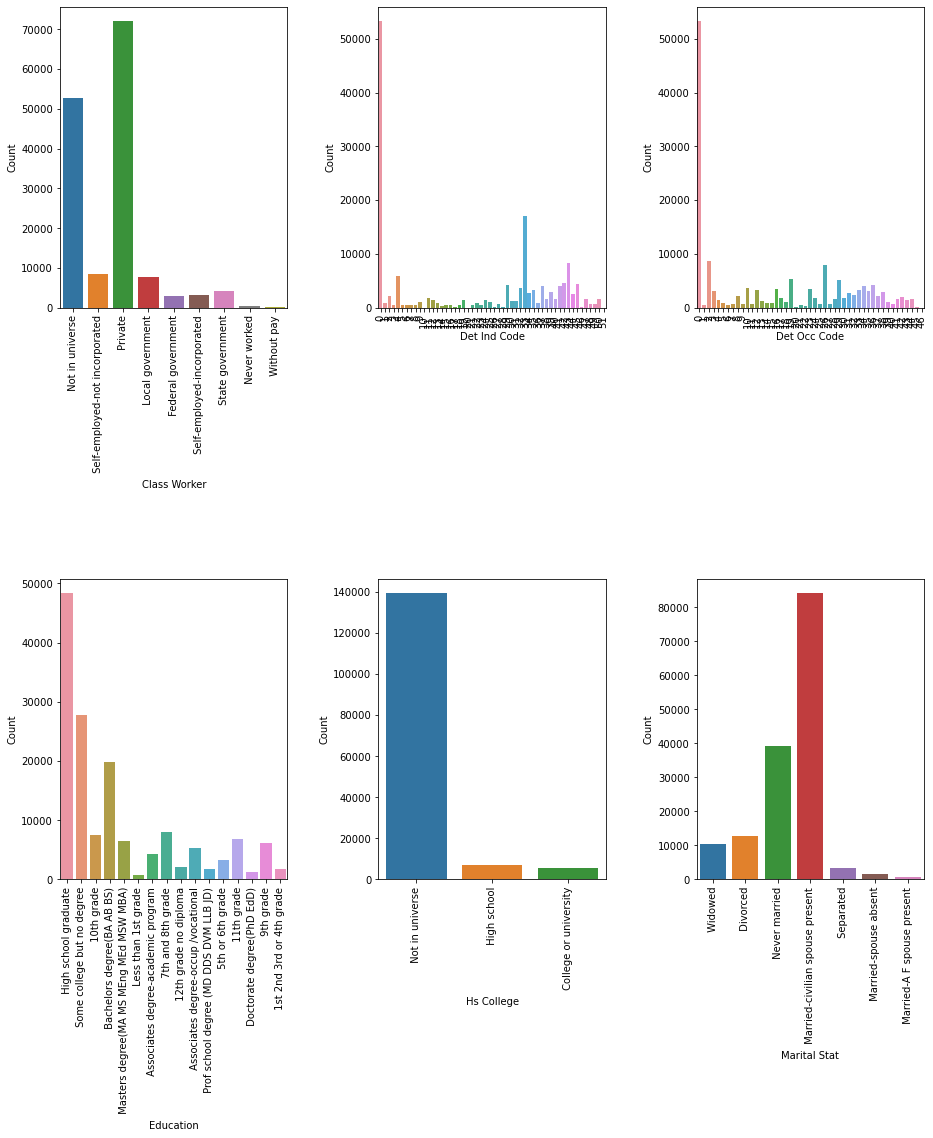

In [20]:
categoricals1 = categ_features[:6]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals1):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.9)

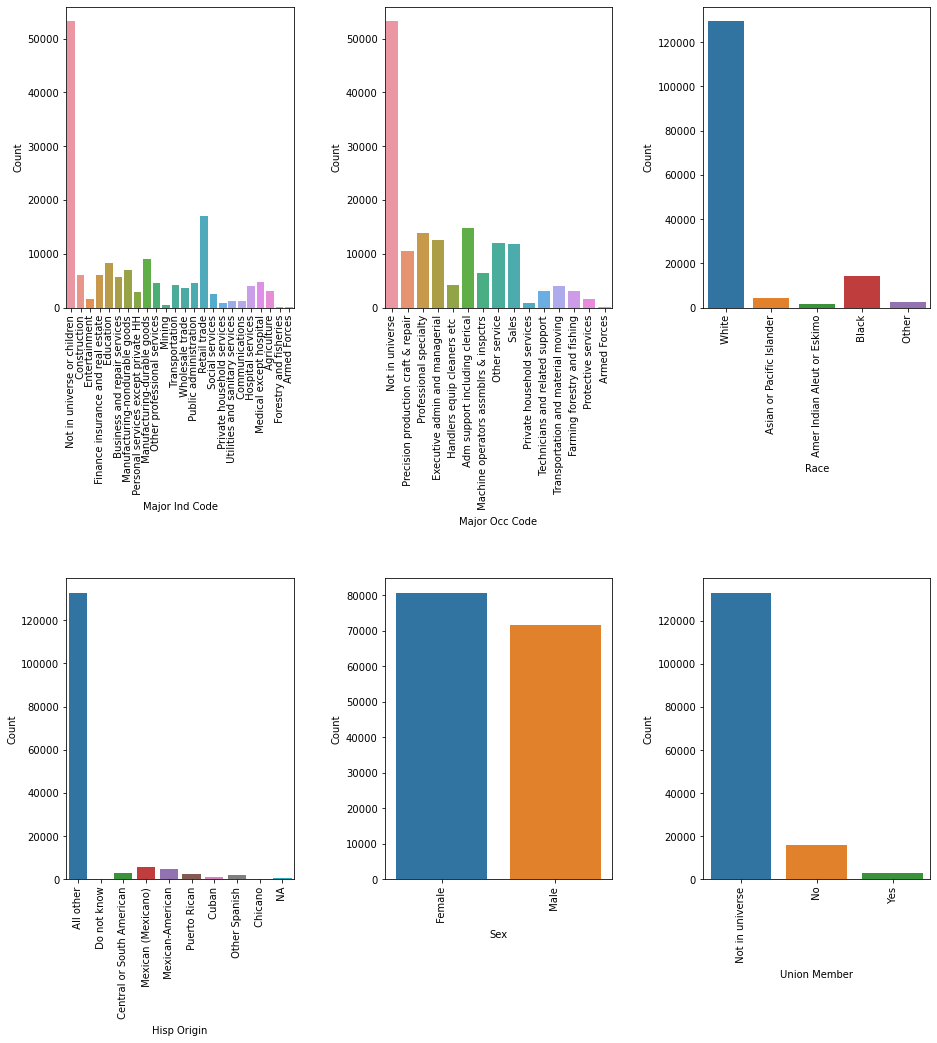

In [21]:
categoricals2 = categ_features[6:12]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals2):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.4, hspace=0.9)

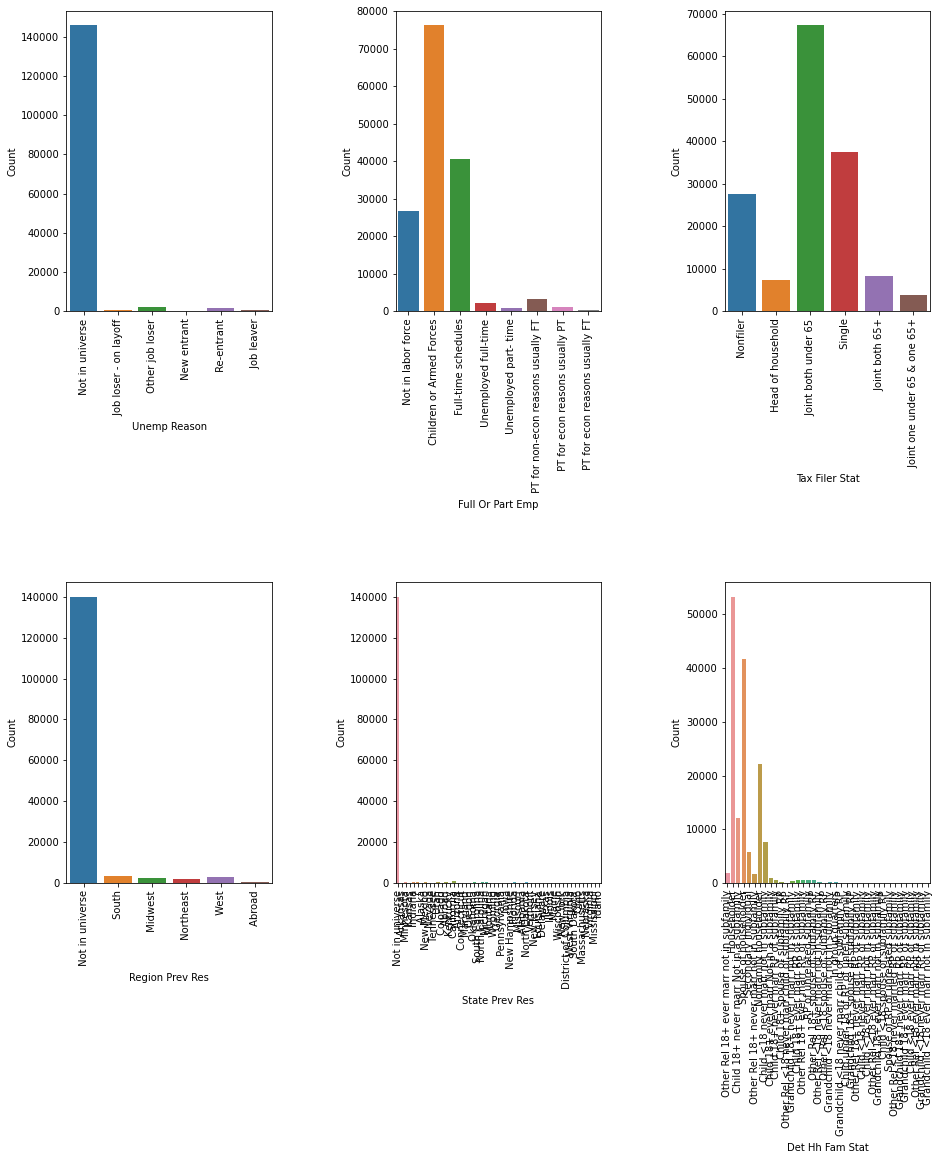

In [22]:
categoricals3 = categ_features[12:18]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals3):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.6, hspace=0.9)

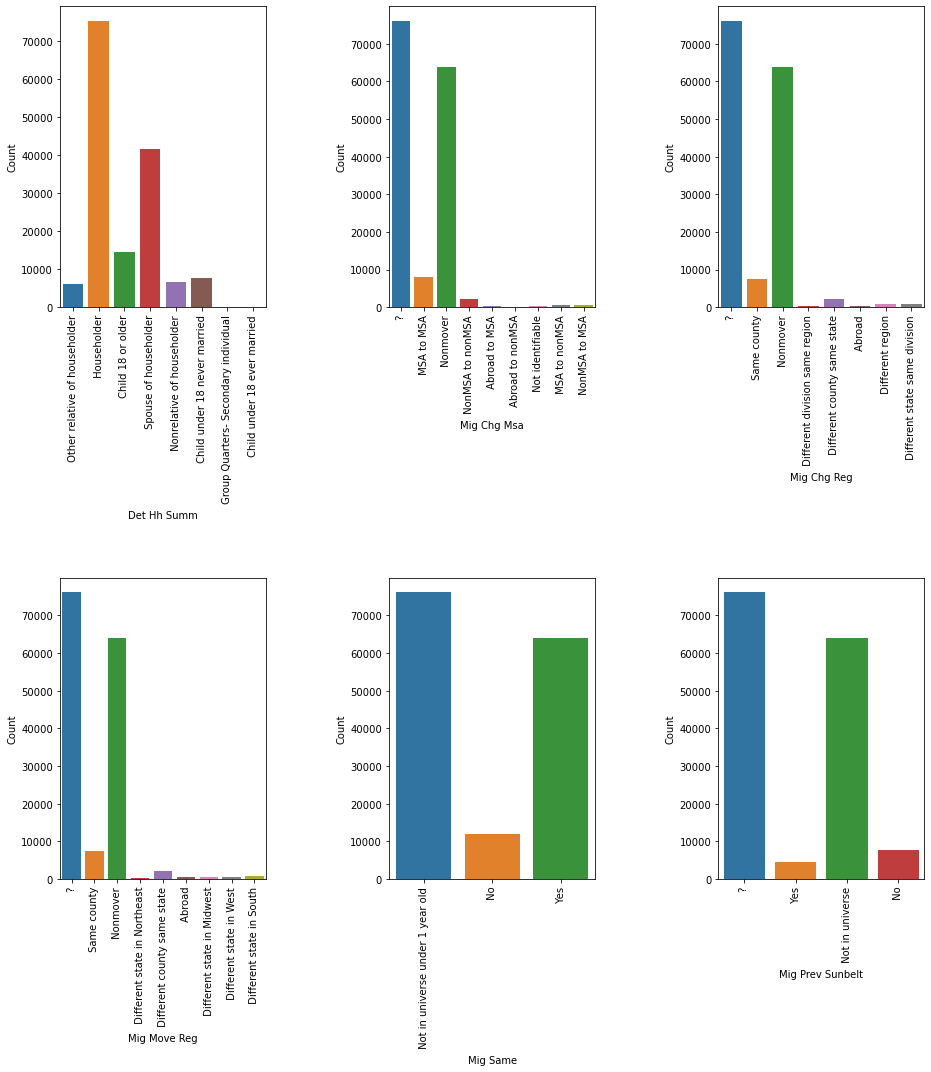

In [23]:
categoricals4 = categ_features[18:24]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals4):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.6, hspace=0.9)

---

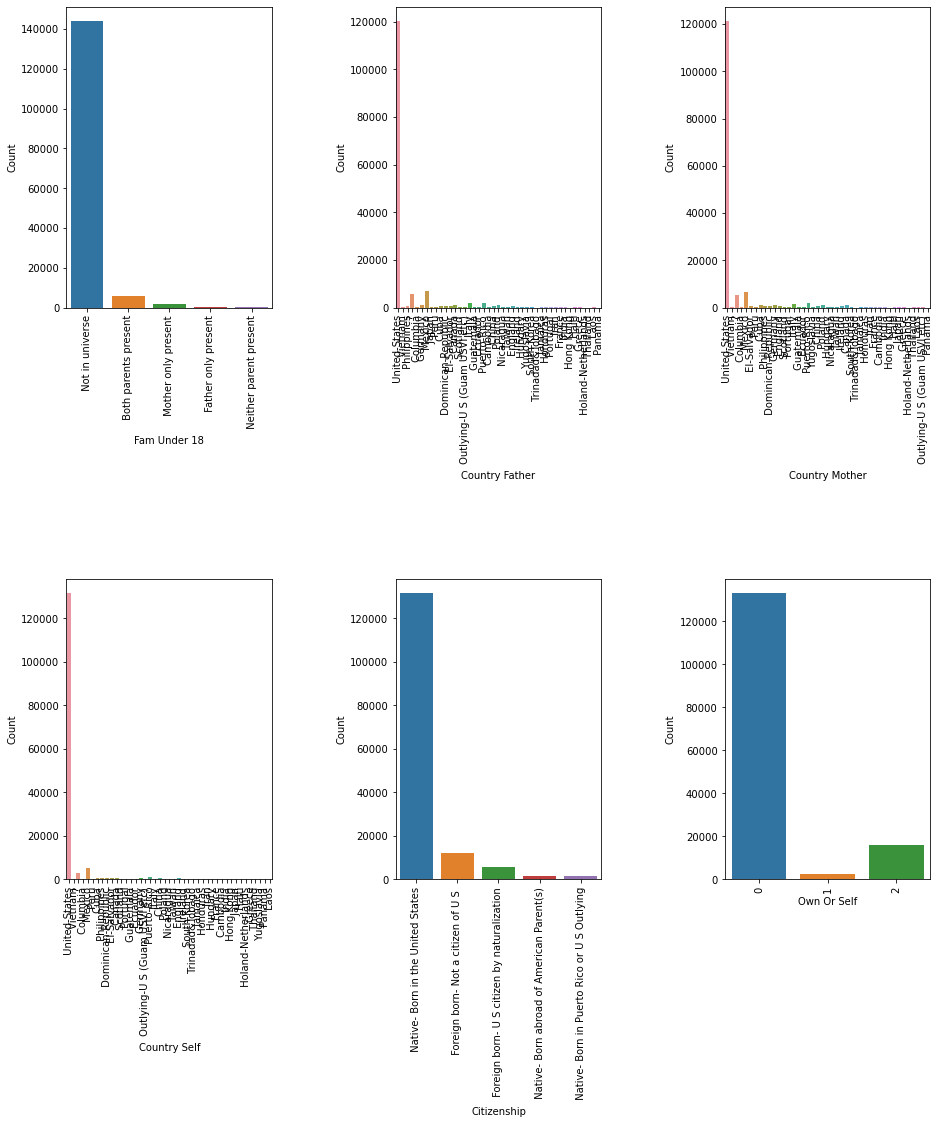

In [24]:
categoricals4 = categ_features[24:30]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals4):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.6, hspace=0.9)

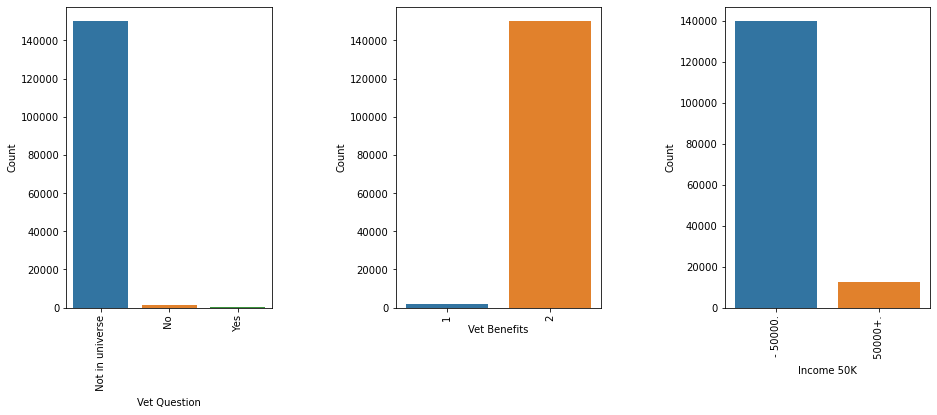

In [25]:
categoricals5 = categ_features[30:34]

fig = plt.figure(figsize=(15, 20))

for i, cat in enumerate(categoricals5):
    plt.subplot(4, 3, i+1)
    sns.countplot(data = census_adult, x = cat);
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.5, wspace=0.6, hspace=0.9)

---

Ahora, filtremos los nombres de variables numéricas y exploremos su correlación.

In [26]:
num_features = features[features.Type=='numeric'].Code.tolist()
print(num_features, '\n\n Number of num columns:', len(num_features))

['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'stock_dividends', 'instance_weight', 'num_emp', 'weeks_worked', 'year'] 

 Number of num columns: 9


In [27]:
scatter_vars = num_features + ['income_50k']
print(scatter_vars)

['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'stock_dividends', 'instance_weight', 'num_emp', 'weeks_worked', 'year', 'income_50k']


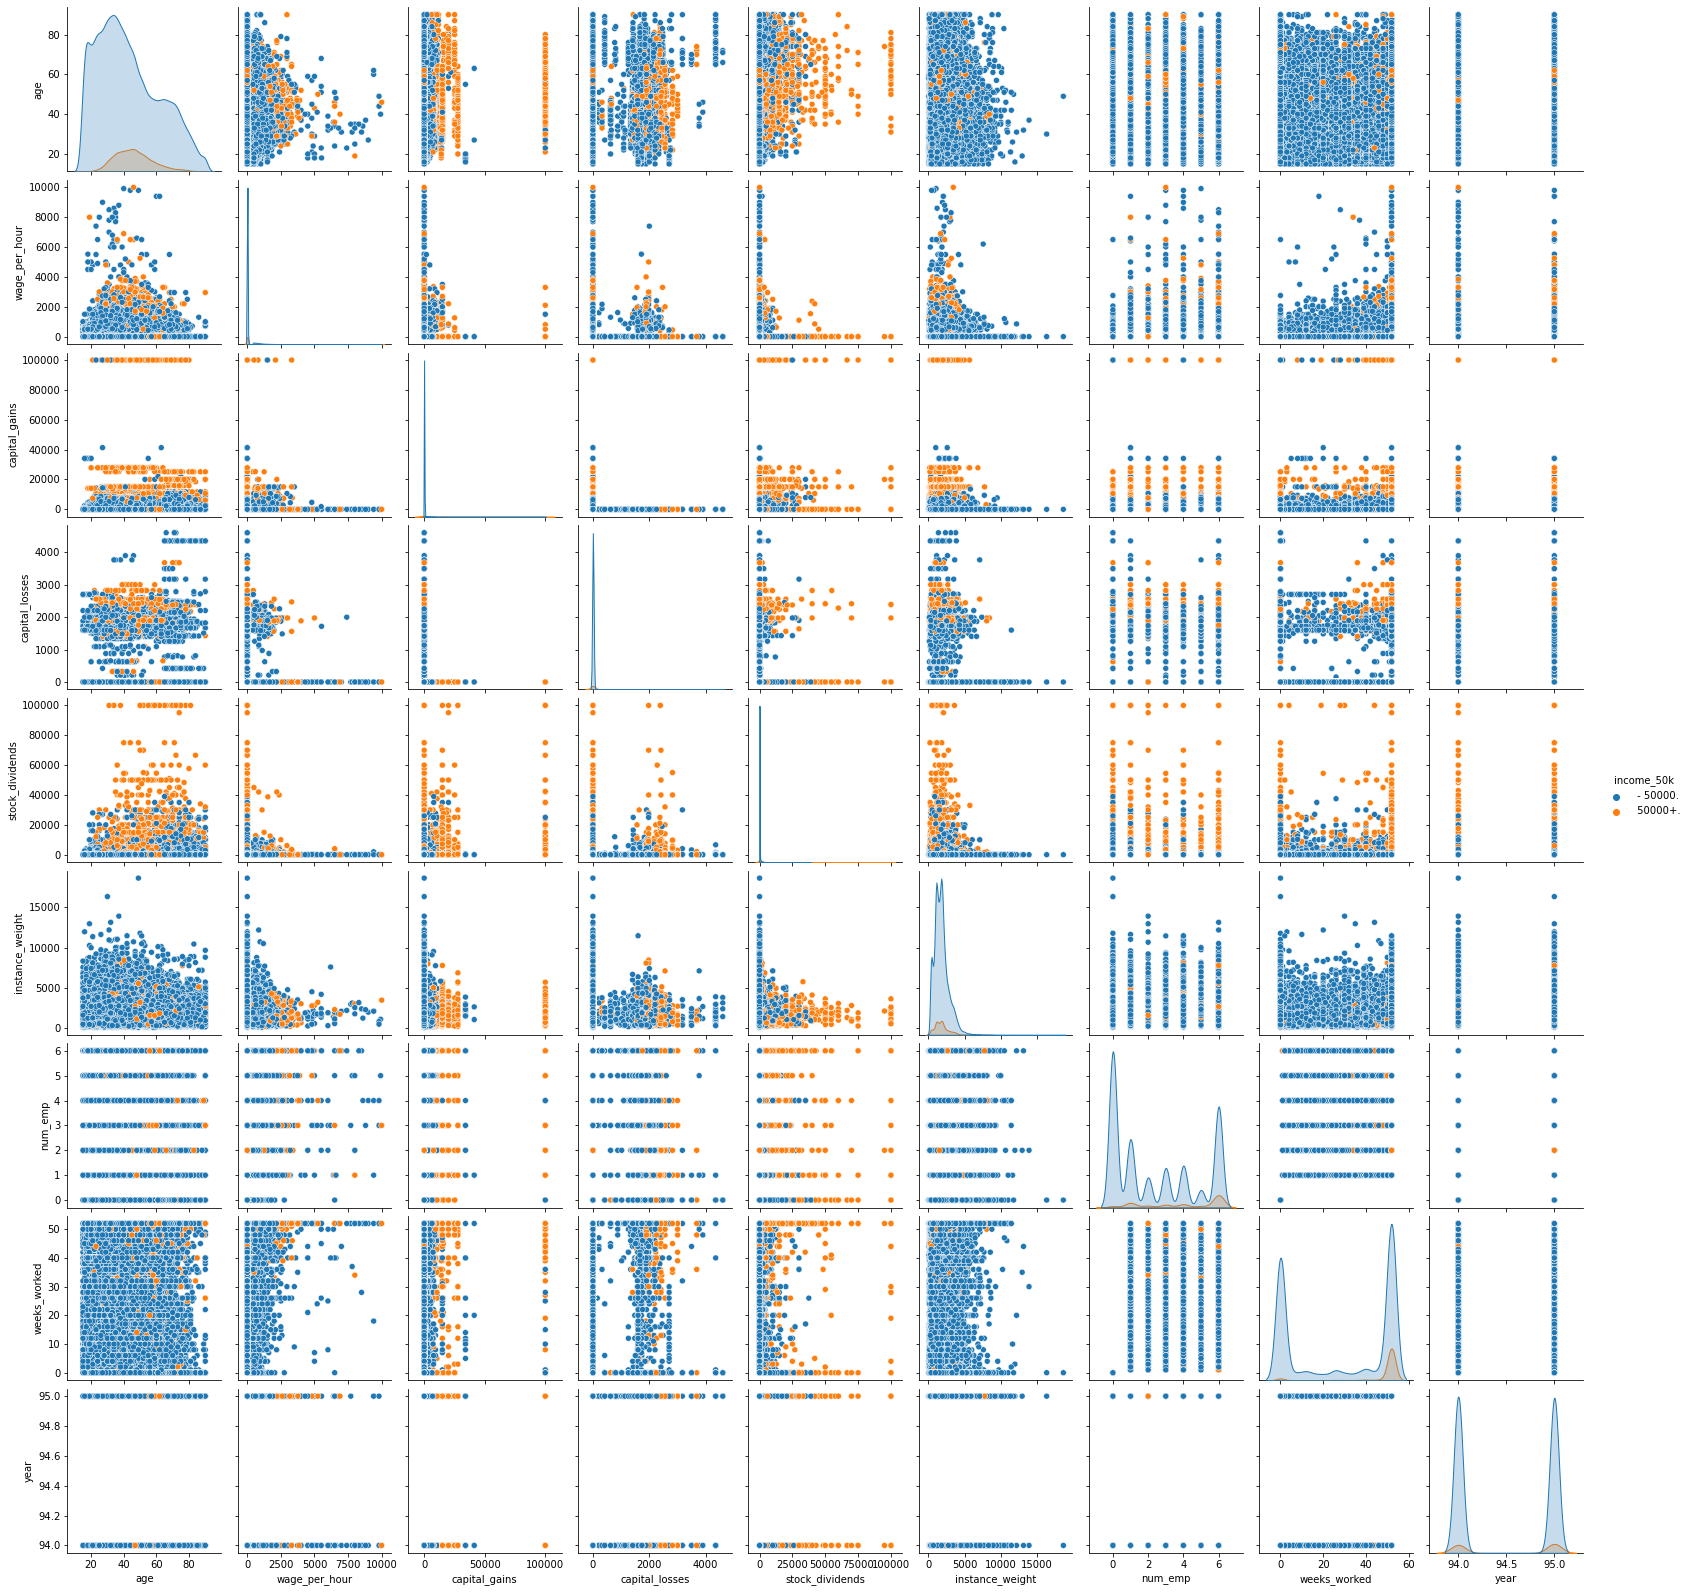

In [28]:
sns.pairplot(census_adult, hue='income_50k', vars=num_features);

In [29]:
census_adult[num_features].corr()

age  wage_per_hour  capital_gains  capital_losses  \
age              1.000000      -0.056768       0.025082        0.014776   
wage_per_hour   -0.056768       1.000000      -0.006953        0.002388   
capital_gains    0.025082      -0.006953       1.000000       -0.016731   
capital_losses   0.014776       0.002388      -0.016731        1.000000   
stock_dividends  0.092889      -0.012085       0.128975        0.038339   
instance_weight -0.044036       0.008867       0.000510        0.005610   
num_emp         -0.277544       0.158338       0.038554        0.055256   
weeks_worked    -0.260313       0.161423       0.066317        0.071136   
year             0.002577       0.002199       0.005816       -0.000183   

                 stock_dividends  instance_weight   num_emp  weeks_worked  \
age                     0.092889        -0.044036 -0.277544     -0.260313   
wage_per_hour          -0.012085         0.008867  0.158338      0.161423   
capital_gains           0.128975         0.000510  0.038554      0.066317   
capital_losses          0.038339         0.005610  0.055256      0.071136   
stock_dividends         1.000000        -0.002571 -0.020851     -0.018477   
instance_weight        -0.002571         1.000000  0.030664      0.010293   
num_emp                -0.020851         0.030664  1.000000      0.668120   
weeks_worked           -0.018477         0.010293  0.668120      1.000000   
year                    0.001982         0.009599  0.022256      0.004709   

                     year  
age              0.002577  
wage_per_hour    0.002199  
capital_gains    0.005816  
capital_losses  -0.000183  
stock_dividends  0.001982  
instance_weight  0.009599  
num_emp          0.022256  
weeks_worked     0.004709  
year             1.000000

In [30]:
census_adult[num_features].corr().abs().unstack().sort_values(ascending=False).drop_duplicates()[0:15]

age             age                1.000000
num_emp         weeks_worked       0.668120
age             num_emp            0.277544
                weeks_worked       0.260313
weeks_worked    wage_per_hour      0.161423
num_emp         wage_per_hour      0.158338
capital_gains   stock_dividends    0.128975
age             stock_dividends    0.092889
weeks_worked    capital_losses     0.071136
capital_gains   weeks_worked       0.066317
wage_per_hour   age                0.056768
num_emp         capital_losses     0.055256
age             instance_weight    0.044036
num_emp         capital_gains      0.038554
capital_losses  stock_dividends    0.038339
dtype: float64

Los diagramas de dispersión no muestran un patrón de variabilidad conjunta, la matriz de correlación presenta valores bajos. El ranking de la celda anterior muestra que el la relación entre variables numéricas tiene baja intensidad, el único valor moderado es el de la correlación entre `num_emp` y ` weeks_worked`.

In [31]:
census_adult['num_emp'].unique()

array([0, 1, 6, 4, 5, 3, 2], dtype=int64)

In [32]:
census_adult.where(census_adult.own_or_self==0).dropna().head()

age                     class_worker  det_ind_code  det_occ_code  \
0  73.0                  Not in universe           0.0           0.0   
1  58.0   Self-employed-not incorporated           4.0          34.0   
2  18.0                  Not in universe           0.0           0.0   
6  42.0                          Private          34.0           3.0   
7  28.0                          Private           4.0          40.0   

                     education  wage_per_hour        hs_college  \
0         High school graduate            0.0   Not in universe   
1   Some college but no degree            0.0   Not in universe   
2                   10th grade            0.0       High school   
6   Bachelors degree(BA AB BS)            0.0   Not in universe   
7         High school graduate            0.0   Not in universe   

                       marital_stat                      major_ind_code  \
0                           Widowed         Not in universe or children   
1                          Divorced                        Construction   
2                     Never married         Not in universe or children   
6   Married-civilian spouse present   Finance insurance and real estate   
7                     Never married                        Construction   

                         major_occ_code                        race  \
0                       Not in universe                       White   
1   Precision production craft & repair                       White   
2                       Not in universe   Asian or Pacific Islander   
6        Executive admin and managerial                       White   
7          Handlers equip cleaners etc                        White   

  hisp_origin      sex      union_member            unemp_reason  \
0   All other   Female   Not in universe         Not in universe   
1   All other     Male   Not in universe         Not in universe   
2   All other   Female   Not in universe         Not in universe   
6   All other     Male   Not in universe         Not in universe   
7   All other   Female   Not in universe   Job loser - on layoff   

            full_or_part_emp  capital_gains  capital_losses  stock_dividends  \
0         Not in labor force            0.0             0.0              0.0   
1   Children or Armed Forces            0.0             0.0              0.0   
2         Not in labor force            0.0             0.0              0.0   
6   Children or Armed Forces         5178.0             0.0              0.0   
7       Unemployed full-time            0.0             0.0              0.0   

         tax_filer_stat   region_prev_res    state_prev_res  \
0              Nonfiler   Not in universe   Not in universe   
1     Head of household             South          Arkansas   
2              Nonfiler   Not in universe   Not in universe   
6   Joint both under 65   Not in universe   Not in universe   
7                Single   Not in universe   Not in universe   

                             det_hh_fam_stat                     det_hh_summ  \
0   Other Rel 18+ ever marr not in subfamily   Other relative of householder   
1                                Householder                     Householder   
2    Child 18+ never marr Not in a subfamily               Child 18 or older   
6                                Householder                     Householder   
7                       Secondary individual      Nonrelative of householder   

   instance_weight  mig_chg_msa   mig_chg_reg  mig_move_reg  \
0          1700.09            ?             ?             ?   
1          1053.55   MSA to MSA   Same county   Same county   
2           991.95            ?             ?             ?   
6          1535.86     Nonmover      Nonmover      Nonmover   
7           898.83            ?             ?             ?   

                            mig_same  mig_prev_sunbelt  num_emp  \
0   Not in universe under 1 year old                 ?      0.0   
1                          

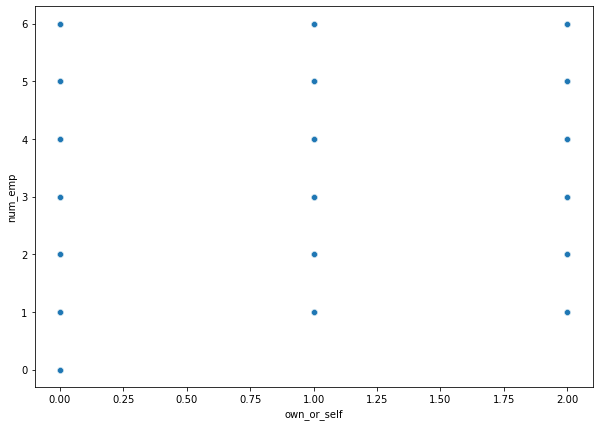

In [33]:
fig = plt.figure(figsize=(10, 7))
sns.scatterplot(x='own_or_self', y='num_emp', data=census_adult);

El gráfico anterior ilustra la relación de los valores de las variables `numn_emp` (explicada como: "Number of persons that worked for employer") y `own_or_self` (explicada como: "Own business or self-employed?"). Se requiere mayor detalle sobre la definición conceptual de esta variable, ya que se evidencia que `num_emp` toma valores sin importar el valor de `own_or_self`. En otras palabras, aunque la persona se declare como empleado dependiente (`own_or_self=0`), el número de empleados (`numn_emp`) puede tomar cualquier valor.

## PCA

Busquemos patrones en los datos usando las categorías existentes en el mismo.

In [34]:
from sklearn.decomposition import PCA

In [35]:
X_num2 = census_adult[num_features[:-1]].values
scaler2 = StandardScaler()
scaler2.fit(X_num2)
X_scaled2 = scaler2.transform(X_num2)
pca2 = PCA(n_components=6)
pca2.fit(X_scaled2)
print('Variance:', pca2.explained_variance_ratio_, 
      '\n\nCum. var.:', np.cumsum(pca2.explained_variance_ratio_))

Variance: [0.23918281 0.14500757 0.12664067 0.12527248 0.1194262  0.10587088] 

Cum. var.: [0.23918281 0.38419038 0.51083105 0.63610353 0.75552973 0.86140061]


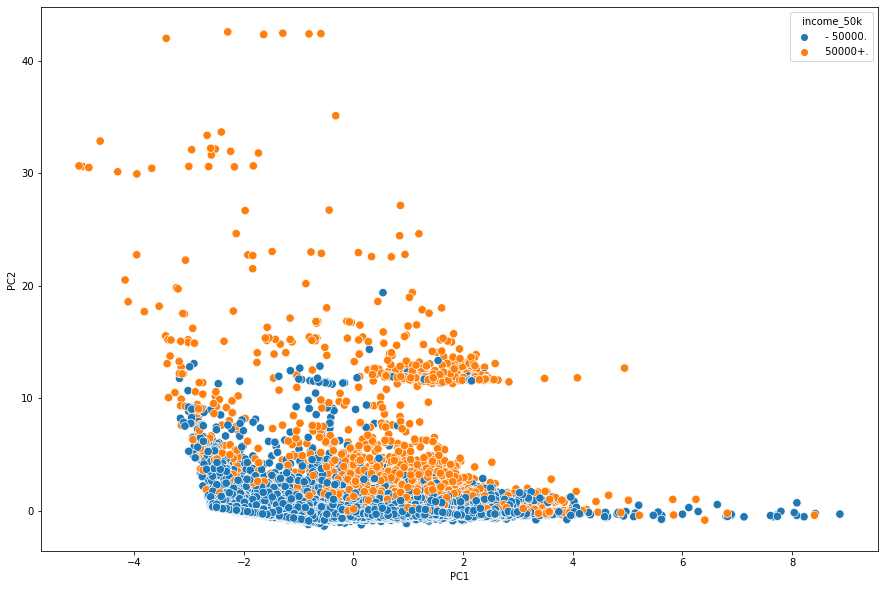

In [36]:
X_pca2_2 = pca2.transform(X_scaled2)
fig = plt.figure(figsize=(15, 10))
plt.xlabel('PC1')
plt.ylabel('PC2')
sns.scatterplot(x=X_pca2_2[:,0], y=X_pca2_2[:,1], s=70,
               hue=census_adult['income_50k']);

Para lograr un valor razonable de varianza acumulada explicada, se requiere definir 4 componentes. Con los 2 primeros se observan clusters respecto a la variabler binaria `income_50k`. También se observan puntos que parecen ser _outliers_ (alejados de la nube de puntos principal), por lo cual vale la pena implementar un método de detección de anomalias.

Ahora, realicemos este ejercicio con los datos de los niños. Cabe recordar que estos no tienen valores válidos para la variable `income_50k`

In [37]:
X_num3 = census_child[num_features[:-1]].values
scaler3 = StandardScaler()
scaler3.fit(X_num3)
X_scaled3 = scaler3.transform(X_num3)
pca3 = PCA(n_components=6)
pca3.fit(X_scaled3)
print('Variance:', pca3.explained_variance_ratio_, 
      '\n\nCum. var.:', np.cumsum(pca3.explained_variance_ratio_))

Variance: [0.51838448 0.48161552 0.         0.         0.         0.        ] 

Cum. var.: [0.51838448 1.         1.         1.         1.         1.        ]


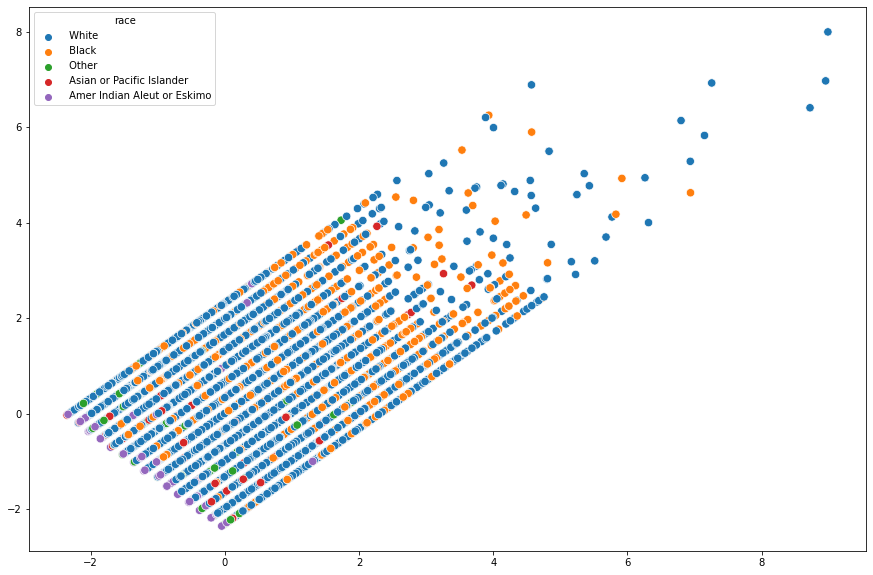

In [38]:
X_pca3_2 = pca3.transform(X_scaled3)
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_pca3_2[:,0], y=X_pca3_2[:,1], s=70,
               hue=census_child['race']);

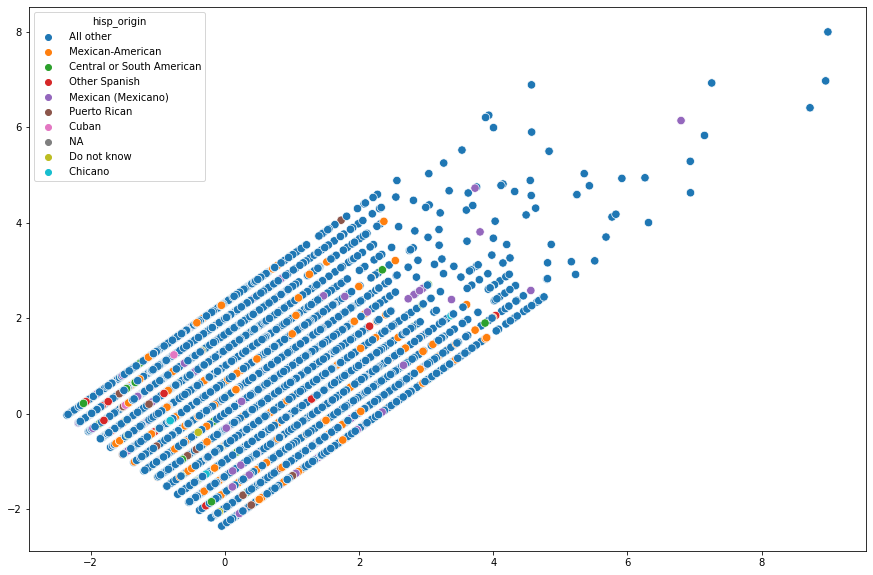

In [39]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_pca3_2[:,0], y=X_pca3_2[:,1], s=70,
               hue=census_child['hisp_origin']);

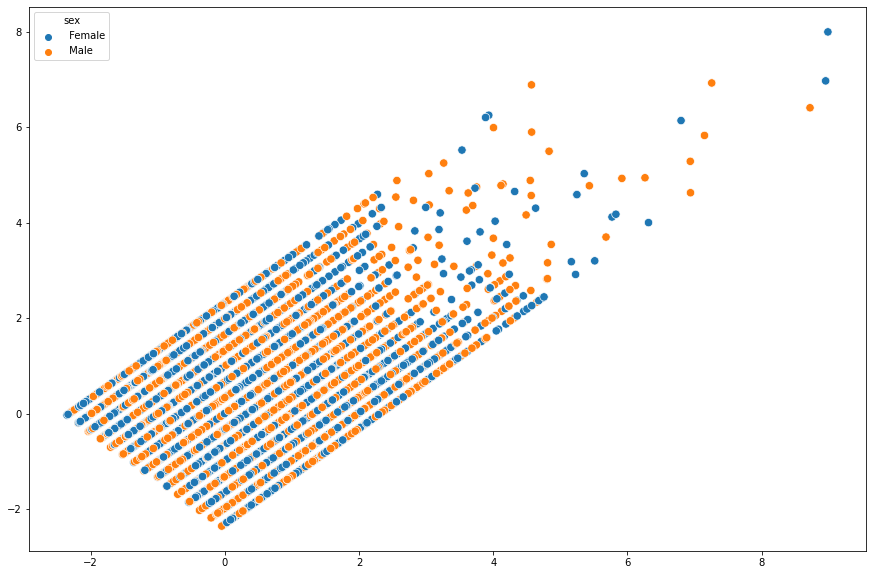

In [40]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_pca3_2[:,0], y=X_pca3_2[:,1], s=70,
               hue=census_child['sex']);

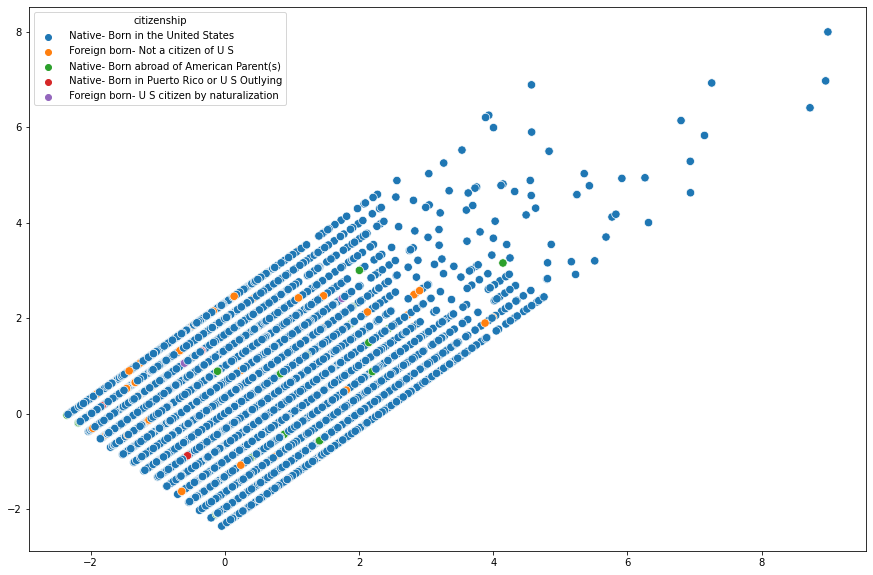

In [41]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_pca3_2[:,0], y=X_pca3_2[:,1], s=70,
               hue=census_child['citizenship']);

Los datos de los niños no evidencian ningún patrón.

A partir de este momento, nos vamos a centrar en los datos de los adultos.

## Boxplots

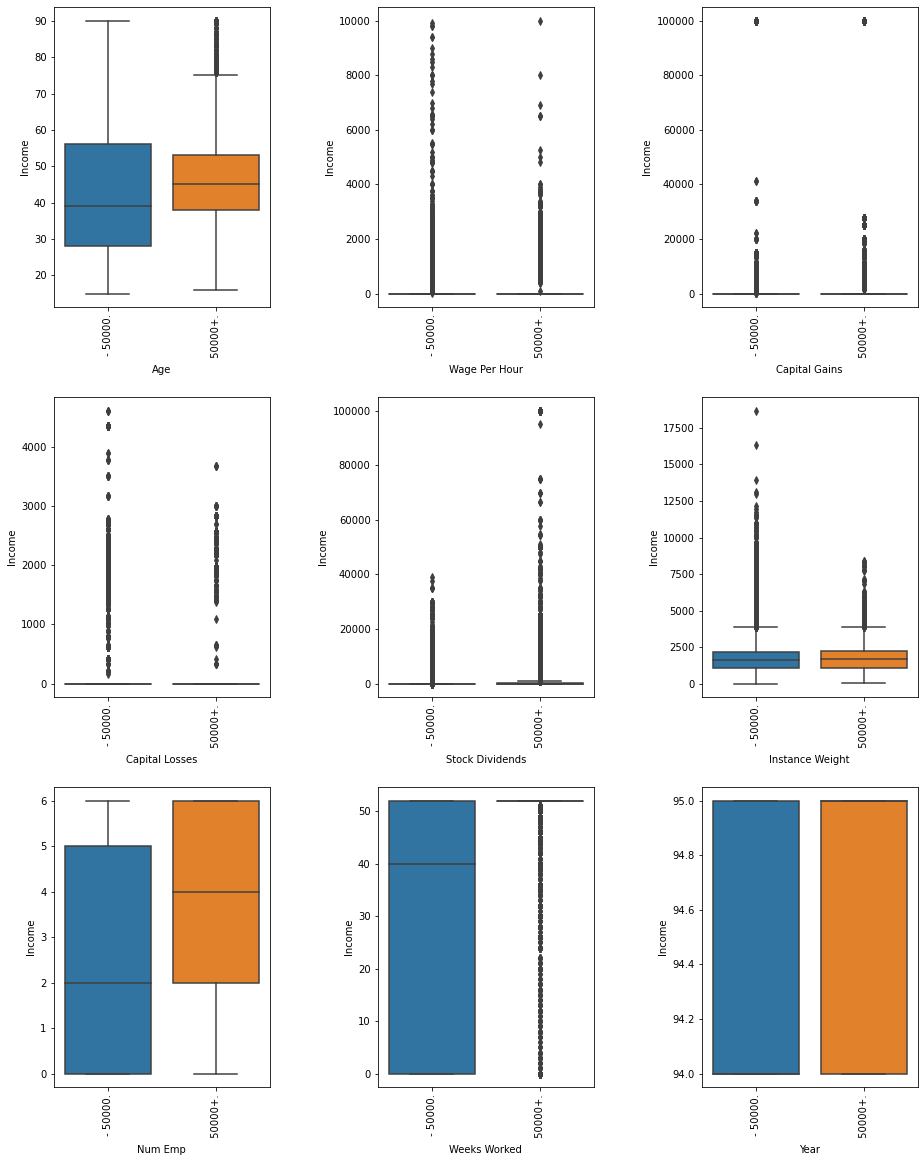

In [42]:
fig = plt.figure(figsize=(15, 15))

for i, cat in enumerate(num_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = census_adult, y = cat, x='income_50k');
    xtitle = ' '.join(cat.title().split('_'))
    plt.xlabel(xtitle)
    plt.ylabel('Income')
    plt.xticks(rotation=90)
plt.subplots_adjust(left=0.1, bottom=0.5, right=0.9, top=1.5, wspace=0.5, hspace=0.3)

Con estos boxplots es evidente la presencia de _outliers_. `year` es una variable con solo dos valores.

---
# One-Hot encoding

Antes de realizar la detección de anomnalías, vamos a relaizar el _one-hot encoding_.

In [43]:
census_adult_ohe = pd.get_dummies(census_adult, columns=categ_features[:-1], prefix=categ_features[:-1])

In [44]:
census_adult_ohe

age  wage_per_hour  capital_gains  capital_losses  stock_dividends  \
0        73              0              0               0                0   
1        58              0              0               0                0   
2        18              0              0               0                0   
5        48           1200              0               0                0   
6        42              0           5178               0                0   
...     ...            ...            ...             ...              ...   
199518   87              0              0               0                0   
199519   65              0           6418               0                9   
199520   47              0              0               0              157   
199521   16              0              0               0                0   
199522   32              0              0               0                0   

        instance_weight  num_emp  weeks_worked  year income_50k  \
0               1700.09        0             0    95   - 50000.   
1               1053.55        1            52    94   - 50000.   
2                991.95        0             0    95   - 50000.   
5                162.61        1            52    95   - 50000.   
6               1535.86        6            52    94   - 50000.   
...                 ...      ...           ...   ...        ...   
199518           955.27        0             0    95   - 50000.   
199519           687.19        1            52    94   - 50000.   
199520          1923.03        6            52    95   - 50000.   
199521          4664.87        0             0    95   - 50000.   
199522          1830.11        6            52    94   - 50000.   

        class_worker_ Federal government  class_worker_ Local government  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
5                                      0                               0   
6                                      0                               0   
...                                  ...                             ...   
199518                                 0                               0   
199519                                 0                               0   
199520                                 0                               0   
199521                                 0                               0   
199522                                 0                               0   

        class_worker_ Never worked  class_worker_ Not in universe  \
0                                0                              1   
1                                0                              0   
2                                0                              1   
5                                0                              0   
6                                0                              0   
...                            ...                            ...   
199518                           0                              1   
199519                           0                              0   
199520                           0                              1   
199521                           0                              1   
199522                           0                              0   

        class_worker_ Private  class_worker_ Self-employed-incorporated  \
0                           0                                         0   
1                           0                                         0   
2                           0                                         0   
5                           1                                         0   
6                           1                                         0   
...                       ...                                       ...   

In [45]:
from sklearn.preprocessing import MinMaxScaler
scalerMinMax = MinMaxScaler() 

In [46]:
all_features = [elem for elem in census_adult_ohe.columns if elem not in ['income_50k']]
X_ohe = census_adult_ohe[all_features].values
X_ohe_scaled = scalerMinMax.fit_transform(X_ohe)

In [47]:
X_ohe_scaled

array([[0.77333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.57333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.04      , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01333333, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.22666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [48]:
X_ohe_scaled.shape

(152101, 505)

---
## Detección de anomalias

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
rs = np.random.RandomState(0)
iso = IsolationForest(max_samples=100, random_state=rs, contamination=0.2) 
iso.fit(X_ohe_scaled)

IsolationForest(contamination=0.2, max_samples=100,
                random_state=RandomState(MT19937) at 0x20FCC4ED340)

In [51]:
if_scores = iso.decision_function(X_ohe_scaled)
if_anomalies = iso.predict(X_ohe_scaled)

In [52]:
print(if_anomalies.shape, if_scores.shape)

(152101,) (152101,)


In [53]:
np.sum(if_anomalies == -1)

30420

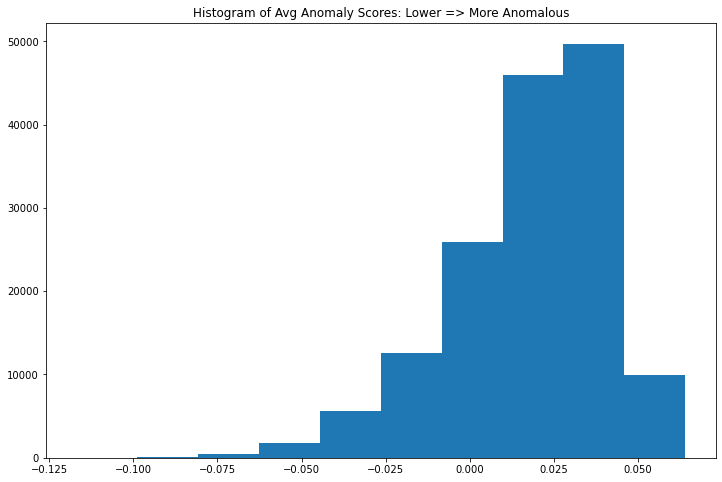

In [54]:
plt.figure(figsize=(12,8))
plt.hist(if_scores);
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous');

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

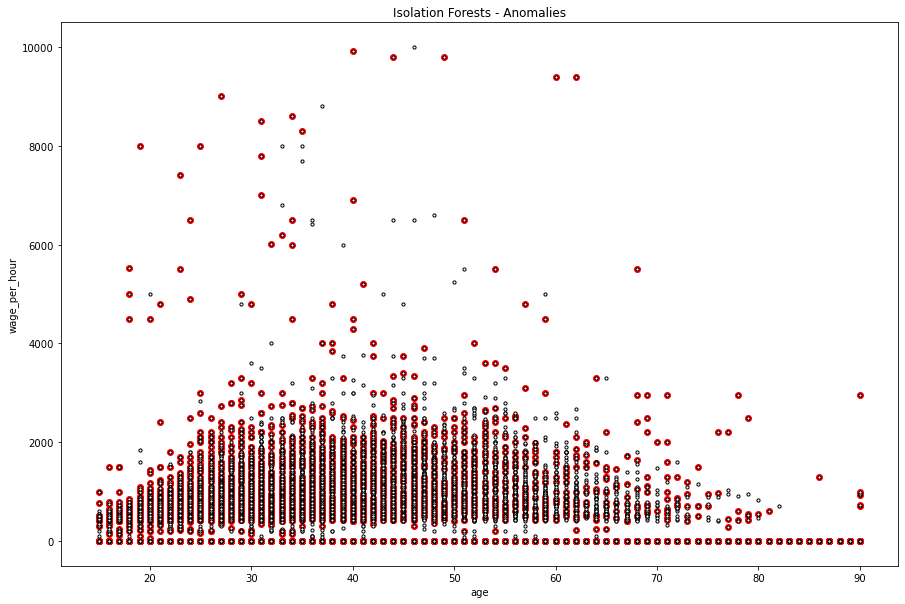

In [55]:
fig = plt.figure(figsize=(15, 10))
cmap=np.array(['white','red'])
plt.scatter(census_adult_ohe['age'][if_anomalies==-1],
            census_adult_ohe['wage_per_hour'][if_anomalies==-1],c='red');
plt.scatter(census_adult_ohe['age'],census_adult_ohe['wage_per_hour'],c='white',s=10,edgecolor='k');
plt.xlabel('age')
plt.ylabel('wage_per_hour')
plt.title('Isolation Forests - Anomalies')

In [56]:
census_final = census_adult_ohe[if_anomalies==1]
census_final.head()

age  wage_per_hour  capital_gains  capital_losses  stock_dividends  \
0   73              0              0               0                0   
5   48           1200              0               0                0   
6   42              0           5178               0                0   
7   28              0              0               0                0   
8   47            876              0               0                0   

   instance_weight  num_emp  weeks_worked  year income_50k  \
0          1700.09        0             0    95   - 50000.   
5           162.61        1            52    95   - 50000.   
6          1535.86        6            52    94   - 50000.   
7           898.83        4            30    95   - 50000.   
8          1661.53        5            52    95   - 50000.   

   class_worker_ Federal government  class_worker_ Local government  \
0                                 0                               0   
5                                 0                               0   
6                                 0                               0   
7                                 0                               0   
8                                 0                               1   

   class_worker_ Never worked  class_worker_ Not in universe  \
0                           0                              1   
5                           0                              0   
6                           0                              0   
7                           0                              0   
8                           0                              0   

   class_worker_ Private  class_worker_ Self-employed-incorporated  \
0                      0                                         0   
5                      1                                         0   
6                      1                                         0   
7                      1                                         0   
8                      0                                         0   

   class_worker_ Self-employed-not incorporated  \
0                                             0   
5                                             0   
6                                             0   
7                                             0   
8                                             0   

   class_worker_ State government  class_worker_ Without pay  det_ind_code_0  \
0                               0                          0               1   
5                               0                          0               0   
6                               0                          0               0   
7                               0                          0               0   
8                               0                          0               0   

   det_ind_code_1  det_ind_code_2  det_ind_code_3  det_ind_code_4  \
0               0               0               0               0   
5               0               0               0               0   
6               0               0               0               0   
7               0               0               0               1   
8               0               0               0               0   

   det_ind_code_5  det_ind_code_6  det_ind_code_7  det_ind_code_8  \
0               0               0               0               0   
5               0               0               0               0   
6               0               0               0               0   
7               0               0               0               0   
8               0               0               0               0   

   det_ind_code_9  det_ind_code_10  det_ind_code_11  det_ind_code_12  \
0               0                0                0                0   
5               0                0                0                0   
6               0                0                0                0   
7               0                0                0 

---
## Feature selection

Se efectúa sobre las variables categoricas, ya que los métodos basados en árboles de decisión presentan problemas ante la alta cardinalidad.

### Tree-based

In [57]:
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
vars_adults =  census_final.columns[11:].tolist()#[elem for elem in categ_features if elem not in ['income_50k']]
print(vars_adults)

['class_worker_ Local government', 'class_worker_ Never worked', 'class_worker_ Not in universe', 'class_worker_ Private', 'class_worker_ Self-employed-incorporated', 'class_worker_ Self-employed-not incorporated', 'class_worker_ State government', 'class_worker_ Without pay', 'det_ind_code_0', 'det_ind_code_1', 'det_ind_code_2', 'det_ind_code_3', 'det_ind_code_4', 'det_ind_code_5', 'det_ind_code_6', 'det_ind_code_7', 'det_ind_code_8', 'det_ind_code_9', 'det_ind_code_10', 'det_ind_code_11', 'det_ind_code_12', 'det_ind_code_13', 'det_ind_code_14', 'det_ind_code_15', 'det_ind_code_16', 'det_ind_code_17', 'det_ind_code_18', 'det_ind_code_19', 'det_ind_code_20', 'det_ind_code_21', 'det_ind_code_22', 'det_ind_code_23', 'det_ind_code_24', 'det_ind_code_25', 'det_ind_code_26', 'det_ind_code_27', 'det_ind_code_28', 'det_ind_code_29', 'det_ind_code_30', 'det_ind_code_31', 'det_ind_code_32', 'det_ind_code_33', 'det_ind_code_34', 'det_ind_code_35', 'det_ind_code_36', 'det_ind_code_37', 'det_ind_c

In [59]:
y = census_final['income_50k']
X = census_final[vars_adults]

In [60]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [61]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

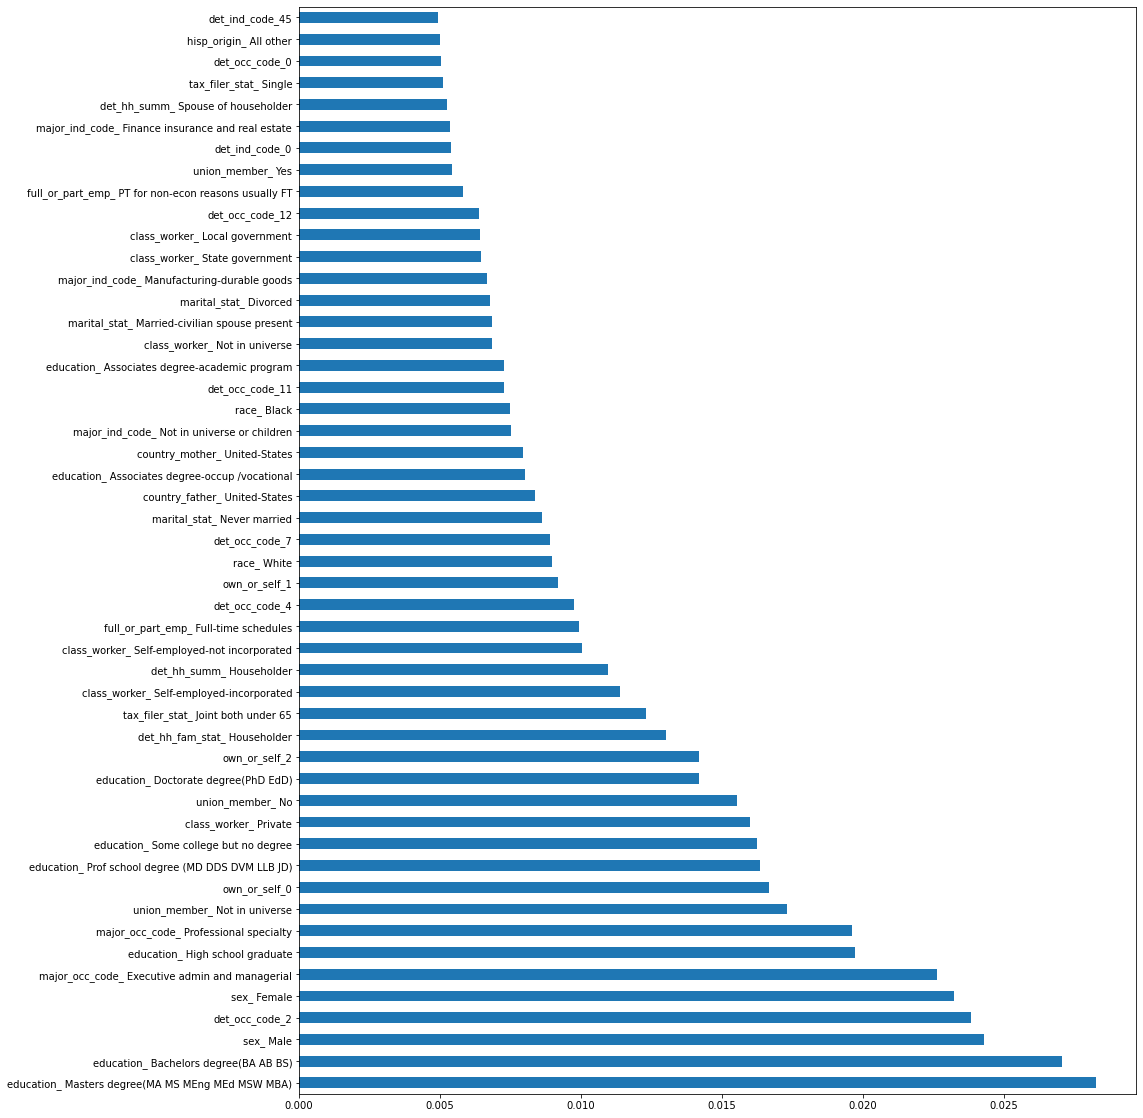

In [62]:
fig = plt.figure(figsize=(15, 20))
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [63]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
s = 0
for f in range(X.shape[1]):
    s += importances[indices[f]]
    print("%d. feature %d %s (%f) (%f)" % (f + 1, indices[f], vars_adults[indices[f]], importances[indices[f]], s))

1. feature 120 education_ Masters degree(MA MS MEng MEd MSW MBA) (0.028295) (0.028295)
2. feature 116 education_ Bachelors degree(BA AB BS) (0.027071) (0.055367)
3. feature 188 sex_ Male (0.024315) (0.079681)
4. feature 62 det_occ_code_2 (0.023828) (0.103510)
5. feature 187 sex_ Female (0.023238) (0.126748)
6. feature 159 major_occ_code_ Executive admin and managerial (0.022626) (0.149374)
7. feature 118 education_ High school graduate (0.019721) (0.169095)
8. feature 167 major_occ_code_ Professional specialty (0.019635) (0.188730)
9. feature 190 union_member_ Not in universe (0.017299) (0.206029)
10. feature 487 own_or_self_0 (0.016665) (0.222694)
11. feature 121 education_ Prof school degree (MD DDS DVM LLB JD) (0.016360) (0.239054)
12. feature 122 education_ Some college but no degree (0.016241) (0.255295)
13. feature 3 class_worker_ Private (0.015989) (0.271285)
14. feature 189 union_member_ No (0.015527) (0.286812)
15. feature 117 education_ Doctorate degree(PhD EdD) (0.014206) (0

### RandomForest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [65]:
clf  = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

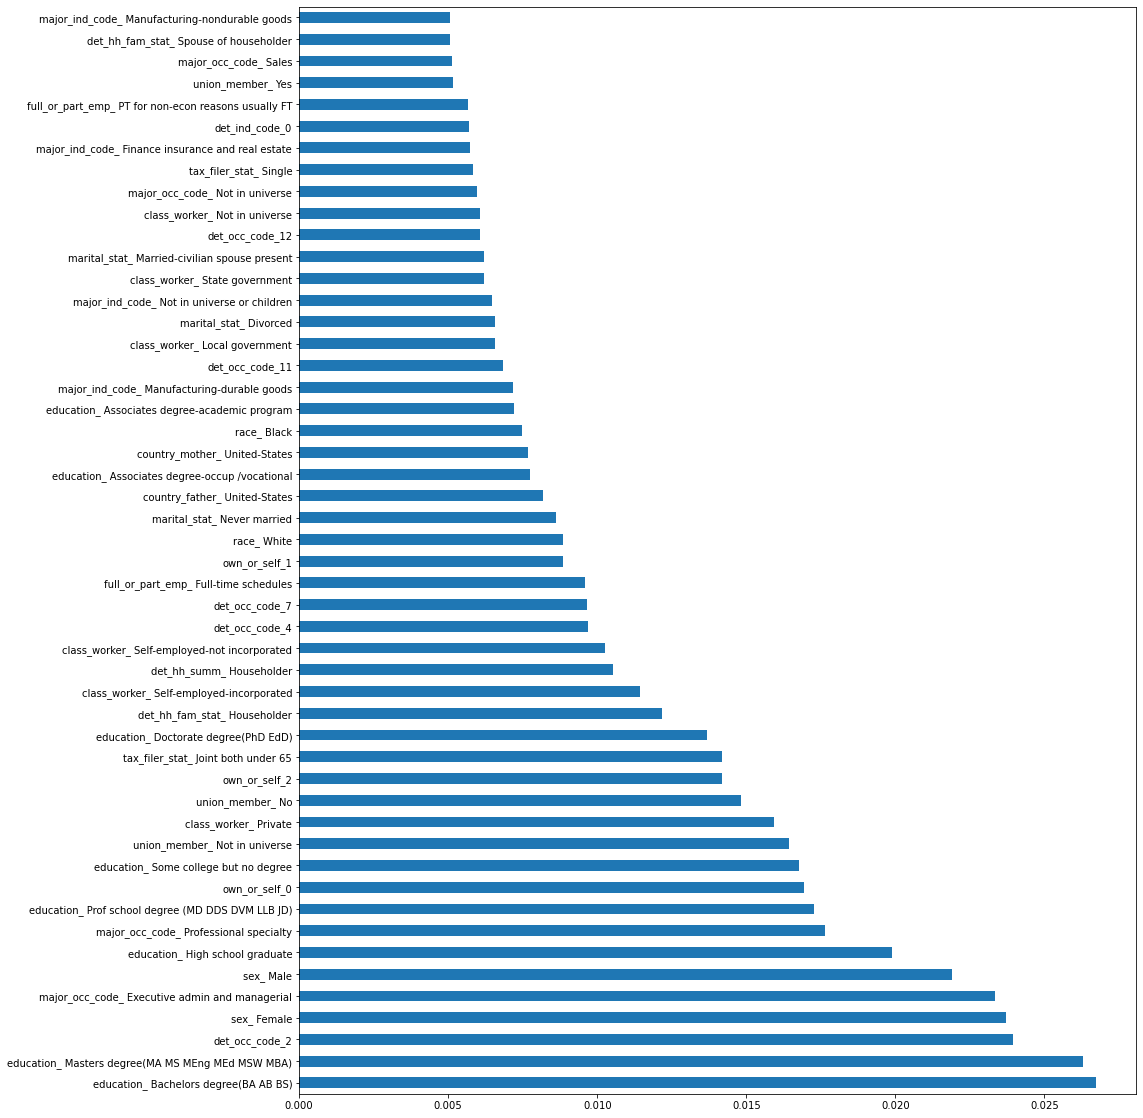

In [66]:
fig = plt.figure(figsize=(15, 20))
feat_importances = pd.Series(clf.feature_importances_, index=vars_adults)
feat_importances.nlargest(50).plot(kind='barh');

In [67]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
s = 0
for f in range(X.shape[1]):
    s += importances[indices[f]]
    print("%d. feature %d %s (%f) (%f)" % (f + 1, indices[f], vars_adults[indices[f]], importances[indices[f]], s))

1. feature 116 education_ Bachelors degree(BA AB BS) (0.026741) (0.026741)
2. feature 120 education_ Masters degree(MA MS MEng MEd MSW MBA) (0.026304) (0.053046)
3. feature 62 det_occ_code_2 (0.023941) (0.076987)
4. feature 187 sex_ Female (0.023714) (0.100701)
5. feature 159 major_occ_code_ Executive admin and managerial (0.023358) (0.124059)
6. feature 188 sex_ Male (0.021915) (0.145974)
7. feature 118 education_ High school graduate (0.019877) (0.165851)
8. feature 167 major_occ_code_ Professional specialty (0.017642) (0.183493)
9. feature 121 education_ Prof school degree (MD DDS DVM LLB JD) (0.017275) (0.200768)
10. feature 487 own_or_self_0 (0.016919) (0.217687)
11. feature 122 education_ Some college but no degree (0.016771) (0.234458)
12. feature 190 union_member_ Not in universe (0.016416) (0.250874)
13. feature 3 class_worker_ Private (0.015920) (0.266793)
14. feature 189 union_member_ No (0.014804) (0.281598)
15. feature 489 own_or_self_2 (0.014196) (0.295794)
16. feature 20

---

## Datos faltantes

Reemplacemos `?` con `NaN`

In [20]:
census_nan = census_adult.replace(' ?', np.NaN, regex=False)
census_nan.iloc[0,25]

nan

Exploremos cuantos datos faltantes hay, y qué _features_ los contienen

In [21]:
census_nan.isna().sum()

age                     0
class_worker            0
det_ind_code            0
det_occ_code            0
education               0
wage_per_hour           0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin             0
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
capital_gains           0
capital_losses          0
stock_dividends         0
tax_filer_stat          0
region_prev_res         0
state_prev_res        550
det_hh_fam_stat         0
det_hh_summ             0
instance_weight         0
mig_chg_msa         76142
mig_chg_reg         76142
mig_move_reg        76142
mig_same                0
mig_prev_sunbelt    76142
num_emp                 0
fam_under_18            0
country_father       5740
country_mother       5188
country_self         3070
citizenship             0
own_or_self             0
vet_question            0
vet_benefits

La mayor cantidad de datos faltantes estan en variables asociadas con la migración. Esto quiere decir que no hay registros eficaces que hagan un seguimiento de este fenómeno. Las _features_ que contienen 99696 registros perdidos son categóricas, y los datos perdidos en ellas representan cerca del 50% del tamaño de la muestra. Por tal razón, se propone eliminar estas columnas del conjunto de datos:

- `mig_chg_msa`.
- `mig_chg_reg`.
- `mig_move_reg`.
- `mig_prev_sunbelt`.

Igualmente, eliminaremos los datos faltantes en otras variables. No es correcto imputar estos valores faltantes en variables categóricas con la moda, ya que se corre el riesgo de sesgar futuros modelos ajustados.

In [22]:
good_columns = [elem for elem in census_nan.columns 
                if elem not in ['mig_chg_msa','mig_chg_reg','mig_move_reg','mig_prev_sunbelt']]
census_nan = census_nan[good_columns].copy()
census_nan.dropna(inplace=True)

Ahora, investiguemos el impacto en el _feature selection_ de eliminar estas variables.

In [76]:
ohe_nan_cols = [elem for elem in categ_features[:-1] 
                if elem not in ['mig_chg_msa','mig_chg_reg','mig_move_reg','mig_prev_sunbelt']]
census_nan_ohe = pd.get_dummies(census_nan, columns=ohe_nan_cols, prefix=ohe_nan_cols)
census_nan_ohe

age  wage_per_hour  capital_gains  capital_losses  stock_dividends  \
0        73              0              0               0                0   
1        58              0              0               0                0   
2        18              0              0               0                0   
5        48           1200              0               0                0   
6        42              0           5178               0                0   
...     ...            ...            ...             ...              ...   
199517   39              0           6849               0                0   
199518   87              0              0               0                0   
199519   65              0           6418               0                9   
199520   47              0              0               0              157   
199521   16              0              0               0                0   

        instance_weight  num_emp  weeks_worked  year income_50k  \
0               1700.09        0             0    95   - 50000.   
1               1053.55        1            52    94   - 50000.   
2                991.95        0             0    95   - 50000.   
5                162.61        1            52    95   - 50000.   
6               1535.86        6            52    94   - 50000.   
...                 ...      ...           ...   ...        ...   
199517           908.14        6            52    95   - 50000.   
199518           955.27        0             0    95   - 50000.   
199519           687.19        1            52    94   - 50000.   
199520          1923.03        6            52    95   - 50000.   
199521          4664.87        0             0    95   - 50000.   

        class_worker_ Federal government  class_worker_ Local government  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
5                                      0                               0   
6                                      0                               0   
...                                  ...                             ...   
199517                                 0                               0   
199518                                 0                               0   
199519                                 0                               0   
199520                                 0                               0   
199521                                 0                               0   

        class_worker_ Never worked  class_worker_ Not in universe  \
0                                0                              1   
1                                0                              0   
2                                0                              1   
5                                0                              0   
6                                0                              0   
...                            ...                            ...   
199517                           0                              0   
199518                           0                              1   
199519                           0                              0   
199520                           0                              1   
199521                           0                              1   

        class_worker_ Private  class_worker_ Self-employed-incorporated  \
0                           0                                         0   
1                           0                                         0   
2                           0                                         0   
5                           1                                         0   
6                           1                                         0   
...                       ...                                       ...   

In [77]:
scalerMinMax = MinMaxScaler() 
all_features = [elem for elem in census_nan_ohe.columns if elem not in ['income_50k']]
X_ohe_nan = census_nan_ohe[all_features].values
X_ohe_scaled_nan = scalerMinMax.fit_transform(X_ohe_nan)
X_ohe_scaled_nan.shape

(144612, 471)

In [78]:
rs = np.random.RandomState(0)
iso = IsolationForest(max_samples=100, random_state=rs, contamination=0.2) 
iso.fit(X_ohe_scaled_nan)

IsolationForest(contamination=0.2, max_samples=100,
                random_state=RandomState(MT19937) at 0x20FCC4EDB40)

In [79]:
if_scores = iso.decision_function(X_ohe_scaled_nan)
if_anomalies = iso.predict(X_ohe_scaled_nan)

In [80]:
if_anomalies.shape

(144612,)

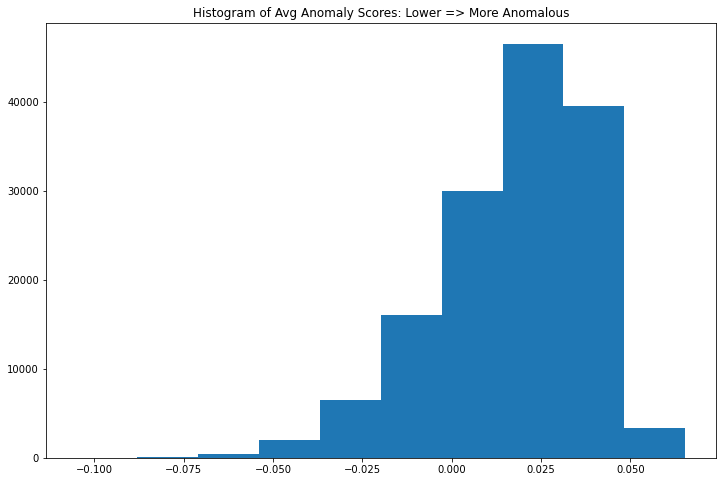

In [81]:
plt.figure(figsize=(12,8))
plt.hist(if_scores);
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous');

In [87]:
print(census_nan_ohe.shape, if_anomalies.shape)

(144612, 472) (144612,)


In [106]:
census_nan_ohe_final = census_nan_ohe
census_nan_ohe_final['anomaly'] = if_anomalies
census_nan_ohe_final = census_nan_ohe_final.loc[census_nan_ohe_final.anomaly==1].copy()
census_nan_ohe_final

age  wage_per_hour  capital_gains  capital_losses  stock_dividends  \
0        73              0              0               0                0   
6        42              0           5178               0                0   
8        47            876              0               0                0   
9        34              0              0               0                0   
12       51              0              0               0                0   
...     ...            ...            ...             ...              ...   
199514   51              0              0               0                0   
199518   87              0              0               0                0   
199519   65              0           6418               0                9   
199520   47              0              0               0              157   
199521   16              0              0               0                0   

        instance_weight  num_emp  weeks_worked  year income_50k  \
0               1700.09        0             0    95   - 50000.   
6               1535.86        6            52    94   - 50000.   
8               1661.53        5            52    95   - 50000.   
9               1146.79        6            52    94   - 50000.   
12              2441.22        3            52    94   - 50000.   
...                 ...      ...           ...   ...        ...   
199514          1302.34        6            52    94   - 50000.   
199518           955.27        0             0    95   - 50000.   
199519           687.19        1            52    94   - 50000.   
199520          1923.03        6            52    95   - 50000.   
199521          4664.87        0             0    95   - 50000.   

        class_worker_ Federal government  class_worker_ Local government  \
0                                      0                               0   
6                                      0                               0   
8                                      0                               1   
9                                      0                               0   
12                                     0                               0   
...                                  ...                             ...   
199514                                 0                               0   
199518                                 0                               0   
199519                                 0                               0   
199520                                 0                               0   
199521                                 0                               0   

        class_worker_ Never worked  class_worker_ Not in universe  \
0                                0                              1   
6                                0                              0   
8                                0                              0   
9                                0                              0   
12                               0                              0   
...                            ...                            ...   
199514                           0                              0   
199518                           0                              1   
199519                           0                              0   
199520                           0                              1   
199521                           0                              1   

        class_worker_ Private  class_worker_ Self-employed-incorporated  \
0                           0                                         0   
6                           1                                         0   
8                           0                                         0   
9                           1                                         0   
12                          1                                         0   
...                       ...                                       ...   

In [107]:
vars_adults_nan =  census_nan_ohe_final.columns[11:].tolist()
y2 = census_nan_ohe_final['income_50k']
X2 = census_nan_ohe_final[vars_adults_nan]

In [108]:
clf  = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1)
clf.fit(X2, y2)

RandomForestClassifier(n_jobs=-1, random_state=0)

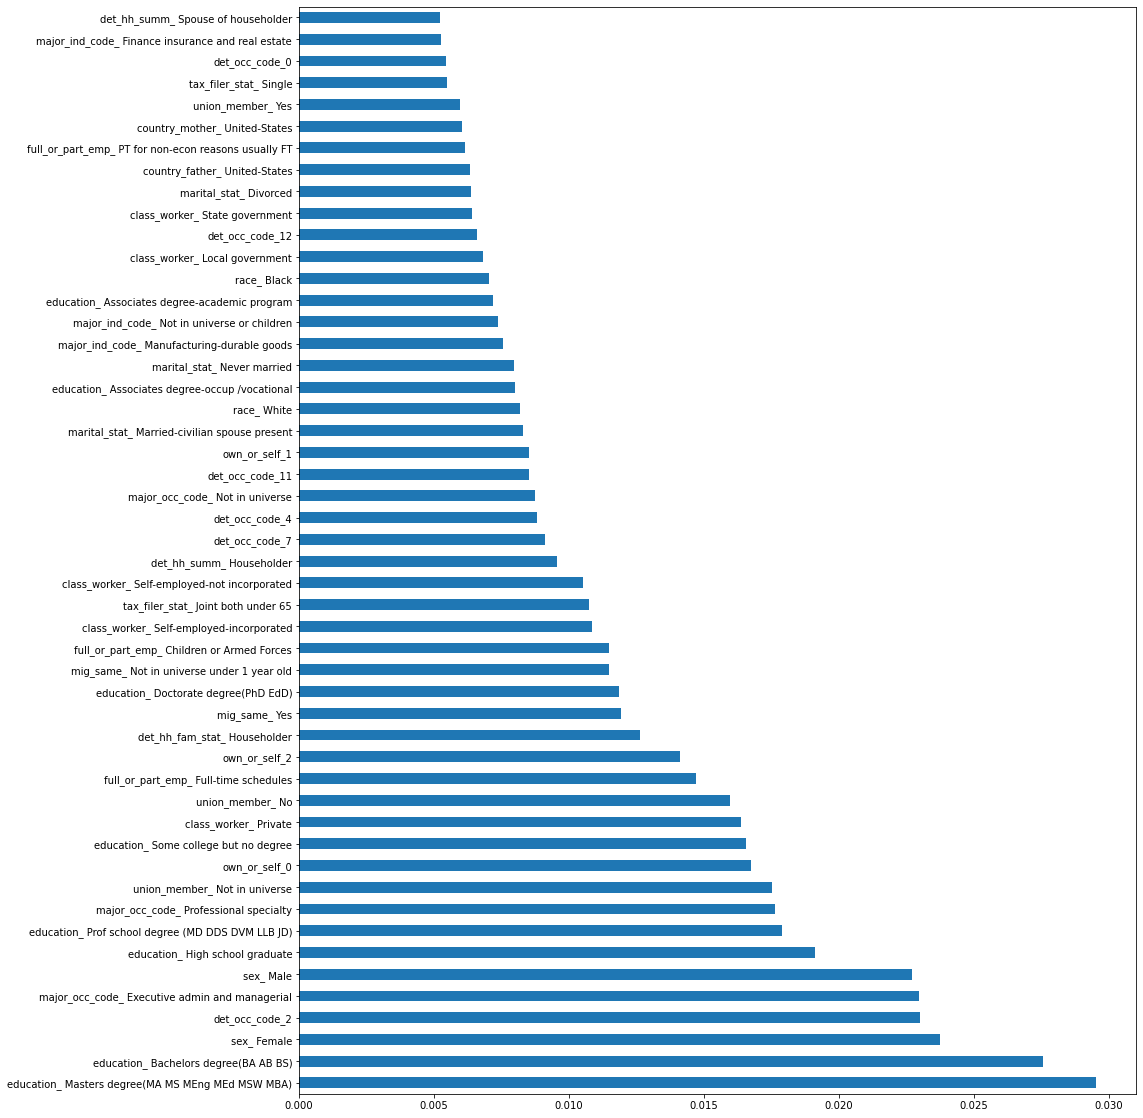

In [109]:
fig = plt.figure(figsize=(15, 20))
feat_importances = pd.Series(clf.feature_importances_, index=vars_adults_nan)
feat_importances.nlargest(50).plot(kind='barh');

In [110]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
s = 0
for f in range(X.shape[1]):
    s += importances[indices[f]]
    print("%d. feature %d %s (%f) (%f)" % (f + 1, indices[f], vars_adults[indices[f]], importances[indices[f]], s))

1. feature 120 education_ Masters degree(MA MS MEng MEd MSW MBA) (0.029537) (0.029537)
2. feature 116 education_ Bachelors degree(BA AB BS) (0.027545) (0.057082)
3. feature 187 sex_ Female (0.023732) (0.080814)
4. feature 62 det_occ_code_2 (0.023011) (0.103824)
5. feature 159 major_occ_code_ Executive admin and managerial (0.022972) (0.126796)
6. feature 188 sex_ Male (0.022694) (0.149490)
7. feature 118 education_ High school graduate (0.019097) (0.168587)
8. feature 121 education_ Prof school degree (MD DDS DVM LLB JD) (0.017883) (0.186471)
9. feature 167 major_occ_code_ Professional specialty (0.017625) (0.204096)
10. feature 190 union_member_ Not in universe (0.017515) (0.221611)
11. feature 453 country_self_ Haiti (0.016744) (0.238355)
12. feature 122 education_ Some college but no degree (0.016546) (0.254901)
13. feature 3 class_worker_ Private (0.016355) (0.271256)
14. feature 189 union_member_ No (0.015960) (0.287216)
15. feature 199 full_or_part_emp_ Full-time schedules (0.014

IndexError: index 462 is out of bounds for axis 0 with size 462

Como se puede ver, estas variables no aportaban información significativa. Procederemos a seleccionar las primeras 18 variables en el ranking de _Random Forest_, que no difiere signficativamente del ranking del _ExtraTree_.

In [130]:
reduced_data = census_nan_ohe_final.iloc[:,indices[0:18]]
reduced_data = pd.concat([census_nan_ohe_final.iloc[:,0:10], reduced_data], axis=1).drop(['instance_weight'], axis=1)
reduced_data

age  wage_per_hour  capital_gains  capital_losses  stock_dividends  \
0        73              0              0               0                0   
6        42              0           5178               0                0   
8        47            876              0               0                0   
9        34              0              0               0                0   
12       51              0              0               0                0   
...     ...            ...            ...             ...              ...   
199514   51              0              0               0                0   
199518   87              0              0               0                0   
199519   65              0           6418               0                9   
199520   47              0              0               0              157   
199521   16              0              0               0                0   

        num_emp  weeks_worked  year income_50k  \
0             0             0    95   - 50000.   
6             6            52    94   - 50000.   
8             5            52    95   - 50000.   
9             6            52    94   - 50000.   
12            3            52    94   - 50000.   
...         ...           ...   ...        ...   
199514        6            52    94   - 50000.   
199518        0             0    95   - 50000.   
199519        1            52    94   - 50000.   
199520        6            52    95   - 50000.   
199521        0             0    95   - 50000.   

        class_worker_ Federal government  education_ 12th grade no diploma  \
0                                      0                                 0   
6                                      0                                 0   
8                                      0                                 0   
9                                      0                                 0   
12                                     0                                 0   
...                                  ...                               ...   
199514                                 0                                 0   
199518                                 0                                 0   
199519                                 0                                 0   
199520                                 0                                 0   
199521                                 0                                 0   

        det_occ_code_45  race_ White  det_ind_code_43  \
0                     0            1                0   
6                     0            1                0   
8                     0            1                1   
9                     0            1                0   
12                    0            1                0   
...                 ...          ...              ...   
199514                0            1                0   
199518                0            1                0   
199519                0            1                0   
199520                0            1                0   
199521                0            1                0   

        major_ind_code_ Other professional services  hisp_origin_ All other  \
0                                                 0                       1   
6                                                 0                       1   
8                                                 0                       1   
9                                                 0                       1   
12                                                0                       0   
...                                             ...                     ...   
199514                                            0                       1   
199518                                            0                       1   
199519                                            0                       1   
199520                                            0       

In [147]:
census_nan_ohe_final.iloc[:,0:10].describe()

age  wage_per_hour  capital_gains  capital_losses  \
count  115689.000000  115689.000000  115689.000000   115689.000000   
mean       44.841688      64.386009     561.728479       49.651263   
std        17.890327     297.193185    5280.459392      312.659396   
min        15.000000       0.000000       0.000000        0.000000   
25%        31.000000       0.000000       0.000000        0.000000   
50%        42.000000       0.000000       0.000000        0.000000   
75%        57.000000       0.000000       0.000000        0.000000   
max        90.000000    9999.000000   99999.000000     4608.000000   

       stock_dividends  instance_weight        num_emp   weeks_worked  \
count    115689.000000    115689.000000  115689.000000  115689.000000   
mean        285.251848      1770.532835       2.550519      30.862493   
std        2401.882827       989.576584       2.407480      23.829098   
min           0.000000        39.110000       0.000000       0.000000   
25%           0.000000      1088.610000       0.000000       0.000000   
50%           0.000000      1660.850000       2.000000      50.000000   
75%           0.000000      2221.150000       5.000000      52.000000   
max       99999.000000     18656.300000       6.000000      52.000000   

                year  
count  115689.000000  
mean       94.516635  
std         0.499725  
min        94.000000  
25%        94.000000  
50%        95.000000  
75%        95.000000  
max        95.000000

In [146]:
np.sum(census_nan_ohe_final.weeks_worked == 0)

37247

---

## Export tidy (One-hot encoded) imputed data

In [148]:
reduced_data.to_csv('data/census.csv')

In [23]:
census_nan.to_csv('data/census_tidy.csv')